In [1]:
# For Mac compatibility
%env PYTORCH_ENABLE_MPS_FALLBACK=1

env: PYTORCH_ENABLE_MPS_FALLBACK=1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datasetsforecast.long_horizon import LongHorizon

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, PatchTST, iTransformer, TSMixer

In [3]:
def load_data(name):
    if name == "ettm1":
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm1')
        Y_df = Y_df[Y_df['unique_id'] == 'OT']
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        val_size = 11520
        test_size = 11520
        freq = '15T'
    elif name == "ettm2":
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTm2')
        Y_df = Y_df[Y_df['unique_id'] == 'OT']
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        val_size = 11520
        test_size = 11520
        freq = '15T'
    elif name == 'etth1':
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTh1')
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        val_size = 2880
        test_size = 2880
        freq = 'H'
    elif name == "etth2":
        Y_df, *_ = LongHorizon.load(directory='./', group='ETTh2')
        Y_df['ds'] = pd.to_datetime(Y_df['ds'])
        val_size = 2880
        test_size = 2880
        freq = 'H'

    return Y_df, val_size, test_size, freq

In [5]:
from utilsforecast.losses import mae, mse
from utilsforecast.evaluation import evaluate

Y_df, val_size, test_size, freq = load_data('ettm1')

horizon = 96

models = [
    iTransformer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    TSMixer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    NHITS(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3),
    PatchTST(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3)
]

nf = NeuralForecast(models=models, freq=freq)
nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

ettm1_evaluation = evaluate(df=nf_preds, metrics=[mae, mse], models=['iTransformer', 'TSMixer', 'NHITS', 'PatchTST'])
ettm1_evaluation.to_csv('ettm1_results.csv', index=False, header=True)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [6]:
Y_df, val_size, test_size, freq = load_data('ettm2')

horizon = 96

models = [
    iTransformer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    TSMixer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    NHITS(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3),
    PatchTST(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3)
]

nf = NeuralForecast(models=models, freq=freq)
nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

ettm2_evaluation = evaluate(df=nf_preds, metrics=[mae, mse], models=['iTransformer', 'TSMixer', 'NHITS', 'PatchTST'])
ettm2_evaluation.to_csv('ettm2_results.csv', index=False, header=True)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [7]:
Y_df, val_size, test_size, freq = load_data('etth1')

horizon = 96

models = [
    iTransformer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    TSMixer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    NHITS(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3),
    PatchTST(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3)
]

nf = NeuralForecast(models=models, freq=freq)
nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

etth1 = evaluate(df=nf_preds, metrics=[mae, mse], models=['iTransformer', 'TSMixer', 'NHITS', 'PatchTST'])
etth1.to_csv('etth1_results.csv', index=False, header=True)

INFO:lightning_fabric.utilities.seed:Seed set to 1


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [8]:
Y_df, val_size, test_size, freq = load_data('etth2')

horizon = 96

models = [
    iTransformer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    TSMixer(h=horizon, input_size=3*horizon, n_series=1, max_steps=1000, early_stop_patience_steps=3),
    NHITS(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3),
    PatchTST(h=horizon, input_size=3*horizon, max_steps=1000, early_stop_patience_steps=3)
]

nf = NeuralForecast(models=models, freq=freq)
nf_preds = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)
nf_preds = nf_preds.reset_index()

etth2 = evaluate(df=nf_preds, metrics=[mae, mse], models=['iTransformer', 'TSMixer', 'NHITS', 'PatchTST'])
etth2.to_csv('etth2_results.csv', index=False, header=True)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [4]:
files = ['etth1_results.csv', 'etth2_results.csv', 'ettm1_results.csv', 'ettm2_results.csv']
datasets = ['etth1', 'etth2', 'ettm1', 'ettm2']

dataframes = []

for file, dataset in zip(files, datasets):
    df = pd.read_csv(file)
    df['dataset'] = dataset

    dataframes.append(df)

full_df = pd.concat(dataframes, ignore_index=True)
full_df = full_df.drop(['unique_id'], axis=1)
full_df

,metric,iTransformer,TSMixer,NHITS,PatchTST,dataset
0,mae,0.199222,0.179790,0.254200,0.180111,etth1
1,mse,0.066427,0.055466,0.108906,0.056225,etth1
2,mae,0.297459,0.285610,0.300729,0.278915,etth2
3,mse,0.144884,0.135374,0.149168,0.129014,etth2
4,mae,0.129120,0.123397,0.245856,0.121257,ettm1
5,mse,0.028905,0.027247,0.100262,0.026536,ettm1
6,mae,0.218220,0.187393,0.209624,0.178034,ettm2
7,mse,0.080266,0.066310,0.082975,0.062773,ettm2


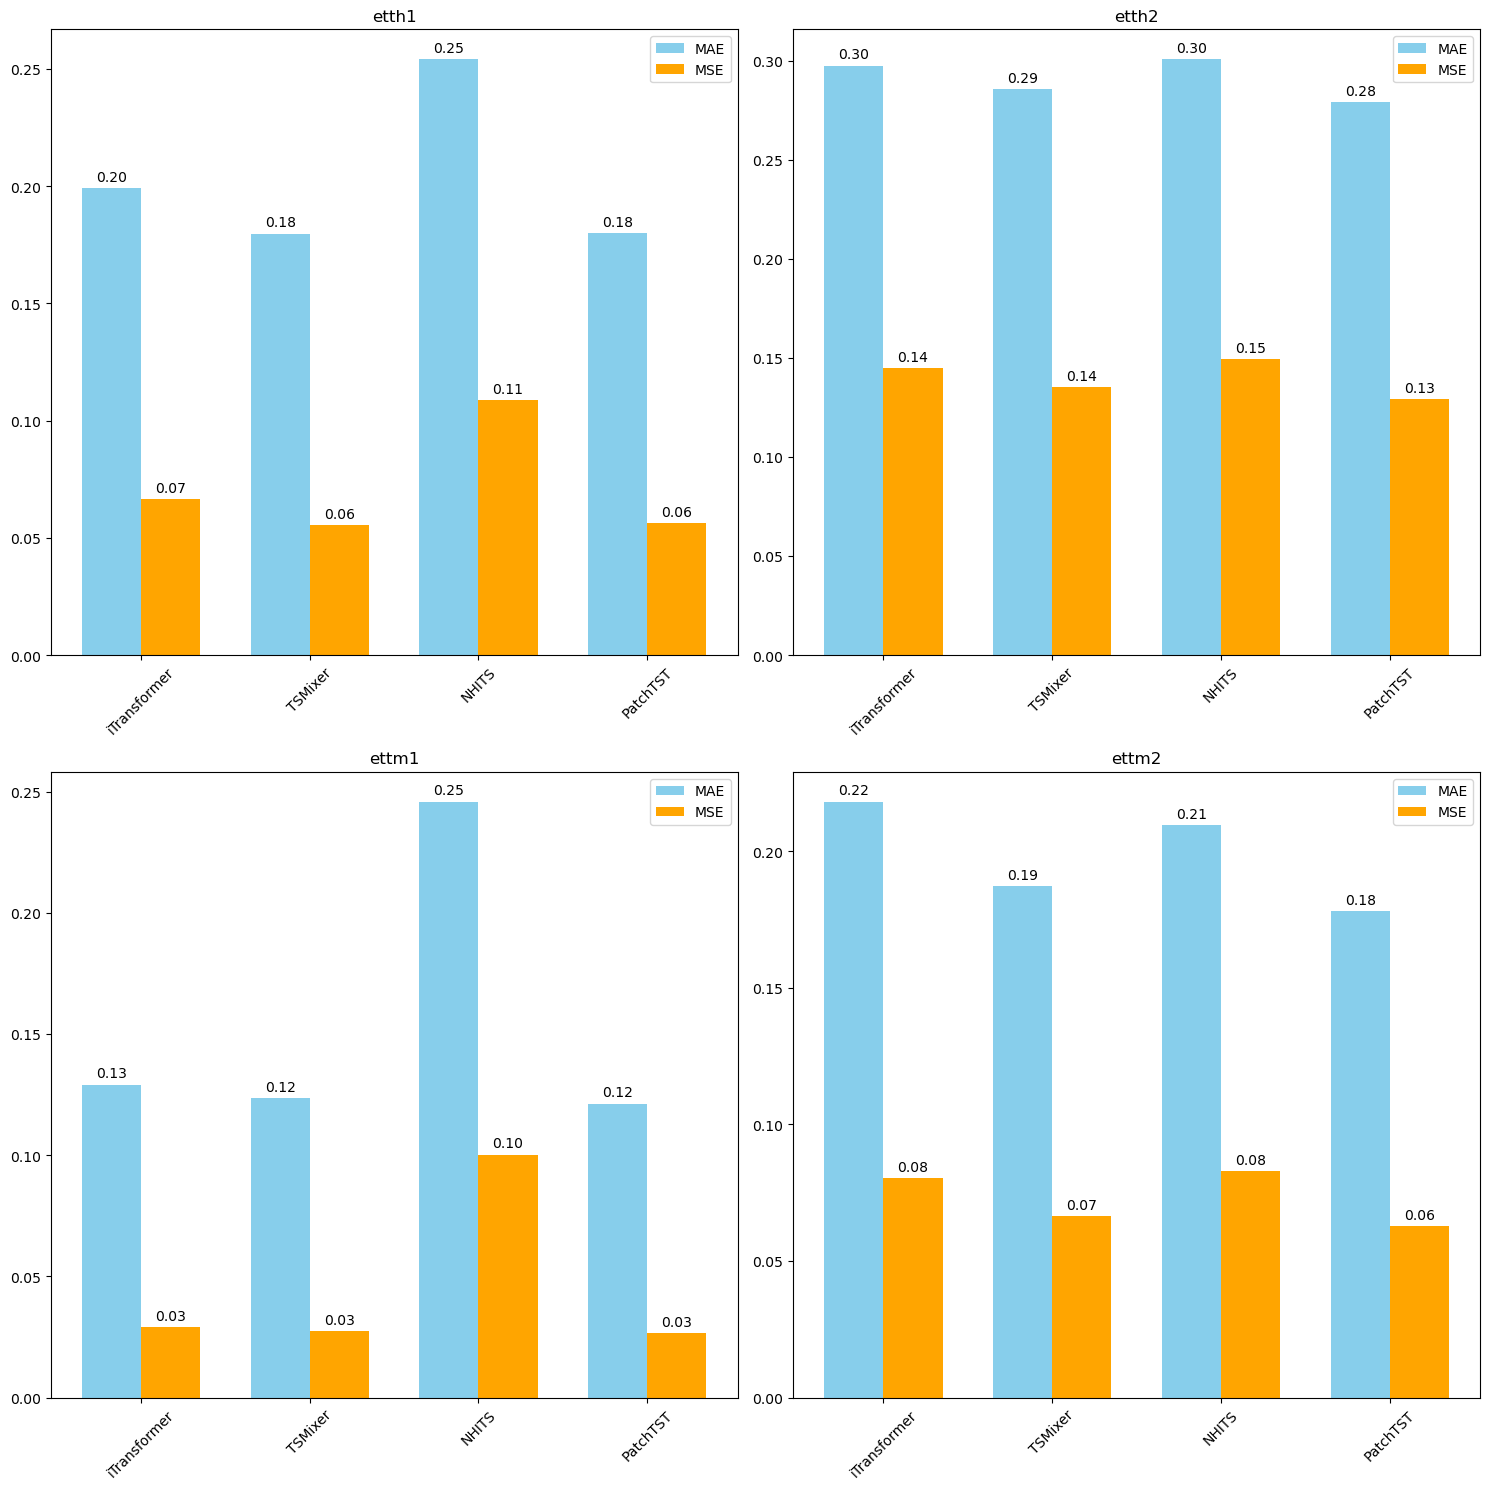

In [5]:
import matplotlib.pyplot as plt
import numpy as np

dataset_names = full_df['dataset'].unique()
model_names = ['iTransformer', 'TSMixer', 'NHITS', 'PatchTST']

fig, axs = plt.subplots(2, 2, figsize=(15, 15)) 
bar_width = 0.35  

axs = axs.flatten()

for i, dataset_name in enumerate(dataset_names):
    df_subset = full_df[(full_df['dataset'] == dataset_name) & (full_df['metric'] == 'mae')]
    mae_vals = df_subset[model_names].values.flatten()
    df_subset = full_df[(full_df['dataset'] == dataset_name) & (full_df['metric'] == 'mse')]
    mse_vals = df_subset[model_names].values.flatten()
    
    indices = np.arange(len(model_names))
    
    bars_mae = axs[i].bar(indices - bar_width / 2, mae_vals, bar_width, color='skyblue', label='MAE')
    bars_mse = axs[i].bar(indices + bar_width / 2, mse_vals, bar_width, color='orange', label='MSE')
    
    for bars in [bars_mae, bars_mse]:
        for bar in bars:
            height = bar.get_height()
            axs[i].annotate(f'{height:.2f}', 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')
    
    axs[i].set_xticks(indices)
    axs[i].set_xticklabels(model_names, rotation=45)
    axs[i].set_title(dataset_name)
    axs[i].legend(loc='best')

plt.tight_layout()

plt.savefig('model_performance_plots.png')
